Chapter 24

# 矩阵运算求解回归参数
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码主要用于分析和可视化鸡和兔的数量之间的关系。首先，通过定义数量数据，代码利用最小二乘法来拟合数据，以得到最佳的线性回归模型。具体步骤如下：

1. **数据准备**：代码定义了两个数组，$num\_chickens$表示鸡的数量，$num\_rabbits$表示兔的数量。通过散点图可视化这两个变量，目的是观察它们之间的关系。

2. **比例函数**：通过计算比例模型的斜率，使用公式：
   $$
   a = (X^TX)^{-1}X^Ty
   $$
   其中，$X$是输入特征矩阵，$y$是目标变量。在代码中，$a$代表鸡的数量与兔的数量之间的比例关系。随后，利用这个比例计算出在不同鸡数量下的兔数量预测值。

3. **线性回归**：代码使用线性回归模型，表示为：
   $$
   y = ax + b
   $$
   这里$a$是斜率，$b$是截距，利用numpy的线性代数运算计算出这些参数，并用于生成拟合直线的预测值。

4. **可视化结果**：代码绘制了两幅图，第一幅展示了散点图和比例函数的预测线，第二幅则展示了散点图及线性模型的拟合线。通过这两幅图，能够直观地看到鸡和兔之间的关系及其线性模型的适应性。

综上所述，通过最小二乘法和线性回归模型，代码展示了鸡和兔数量之间的线性关系，利用可视化手段，清晰地呈现了数据的分布和拟合效果。

## 导入必要的库

In [1]:
import numpy as np  # 导入NumPy库，用于数值计算
import matplotlib.pyplot as plt  # 导入Matplotlib库，用于绘图

## 定义图形装饰函数

In [2]:
def fig_decor(ax):  # 自定义函数，用于设置图形的装饰样式
    plt.xlabel('$x$ (number of chickens)')  # 设置x轴标签，表示鸡的数量
    plt.ylabel('$y$ (number of rabbits)')  # 设置y轴标签，表示兔的数量
    plt.axis('scaled')  # 设置坐标轴比例相同
    ax.set_xlim([0, 120])  # 设置x轴范围为[0, 120]
    ax.set_ylim([0, 80])  # 设置y轴范围为[0, 80]
    plt.xticks(np.arange(0, 120 + 1, step=10))  # 设置x轴刻度，每10为一个间隔
    plt.yticks(np.arange(0, 80 + 1, step=10))  # 设置y轴刻度，每10为一个间隔
    plt.minorticks_on()  # 开启次刻度，用于更精细的刻度显示
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color=[0.8, 0.8, 0.8])  # 设置次刻度网格线样式
    ax.spines['top'].set_visible(False)  # 隐藏上边框
    ax.spines['right'].set_visible(False)  # 隐藏右边框
    ax.spines['bottom'].set_visible(False)  # 隐藏下边框
    ax.spines['left'].set_visible(False)  # 隐藏左边框
    ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])  # 设置主网格线样式

## 定义鸡和兔的数量数据

In [3]:
num_chickens = np.array([32, 110, 71, 79, 45, 20, 56, 55, 87, 68, 87, 63, 31, 88])  # 鸡的数量数据
num_rabbits = np.array([22, 53, 39, 40, 25, 15, 34, 34, 52, 41, 43, 33, 24, 52])  # 兔的数量数据

## 绘制散点图

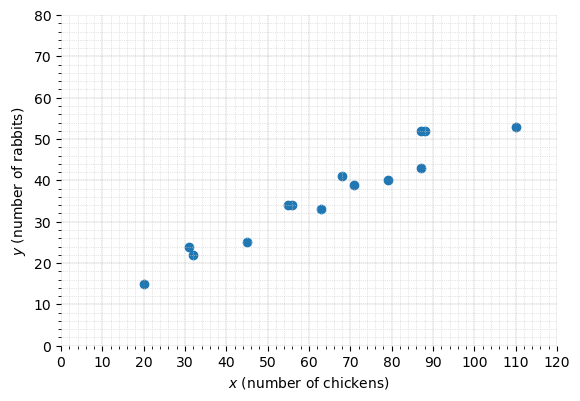

In [4]:
fig, ax = plt.subplots()  # 创建一个新的图形和坐标轴
plt.scatter(num_chickens, num_rabbits)  # 绘制鸡和兔数量的散点图
fig_decor(ax)  # 调用图形装饰函数设置图形样式

## 比例函数 y = ax

In [5]:
x_array = np.linspace(0, 150, 10)[:, None]  # 创建x的取值范围，用于绘制拟合线

In [6]:
x = num_chickens[:, None]  # 将鸡的数量数据转换为列向量形式

In [7]:
y = num_rabbits[:, None]  # 将兔的数量数据转换为列向量形式

In [8]:
a_star_only = np.linalg.inv(x.T @ x) @ x.T @ y  # 通过最小二乘法计算比例关系的参数a

In [9]:
y_pred = a_star_only * x_array  # 根据计算的a值预测y的值

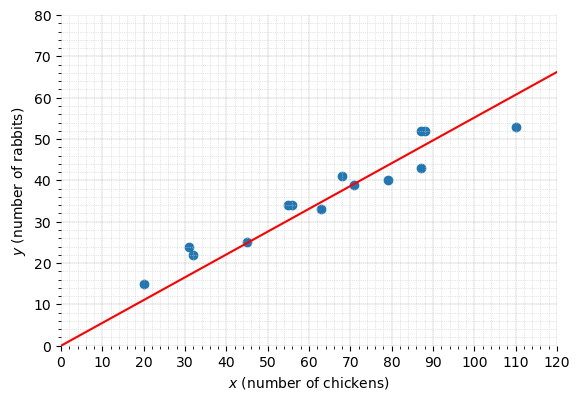

In [10]:
fig, ax = plt.subplots()  # 创建一个新的图形和坐标轴
plt.plot(x_array, y_pred, color='r')  # 绘制比例模型的预测直线
plt.scatter(num_chickens, num_rabbits)  # 绘制原始数据的散点图
fig_decor(ax)  # 调用图形装饰函数设置图形样式

## 线性函数 y = ax + b

In [11]:
X = np.hstack((np.ones_like(x), x))  # 将鸡的数量数据添加一列全1，用于计算线性模型的截距

In [12]:
sol = np.linalg.inv(X.T @ X) @ X.T @ y  # 使用最小二乘法计算线性模型的参数a和b

In [13]:
a_star_ = sol[1]  # 提取线性模型的斜率a

In [14]:
b_star_ = sol[0]  # 提取线性模型的截距b

In [15]:
a_star, b_star = np.polyfit(num_chickens, num_rabbits, 1)  # 使用polyfit函数计算斜率和截距

In [16]:
y_pred = a_star * x_array + b_star  # 使用线性模型计算预测值

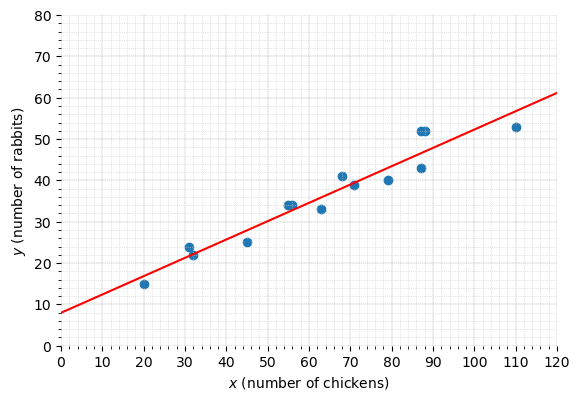

In [17]:
fig, ax = plt.subplots()  # 创建一个新的图形和坐标轴
plt.plot(x_array, y_pred, color='r')  # 绘制线性模型的预测直线
plt.scatter(num_chickens, num_rabbits)  # 绘制原始数据的散点图
fig_decor(ax)  # 调用图形装饰函数设置图形样式